In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV, cross_validate

# importing two different imputation methods that take into consideration all the features when predicting the missing values
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#multiclass imports
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyClassifier #Will identify the maority calss base line, model needs to do better then the baseline

from statistics import mean
# to reduce randomness then you put the seed
np.random.seed(42)

from ArtificialImmuneSystem import *
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import KFold

from tabulate import tabulate
import time
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [22]:
dataset = 'Data\hcv_data_split.csv'
df = pd.read_csv(dataset)

#df = df.drop('Unnamed: 0', axis=1)

In [23]:
print(f"Data shape: \n{df.shape}\n")
print(f"Data size: \n{df.size}\n")
print(f"Data ndim: \n{df.ndim}\n")
print("_____________________________________________\n")
print(f"Old Class Distribution: {Counter(df['category'])}")

Data shape: 
(615, 14)

Data size: 
8610

Data ndim: 
2

_____________________________________________

Old Class Distribution: Counter({0: 540, 1: 75})


In [24]:
features =df.copy()
features = features.drop(['category'],axis=1)



c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


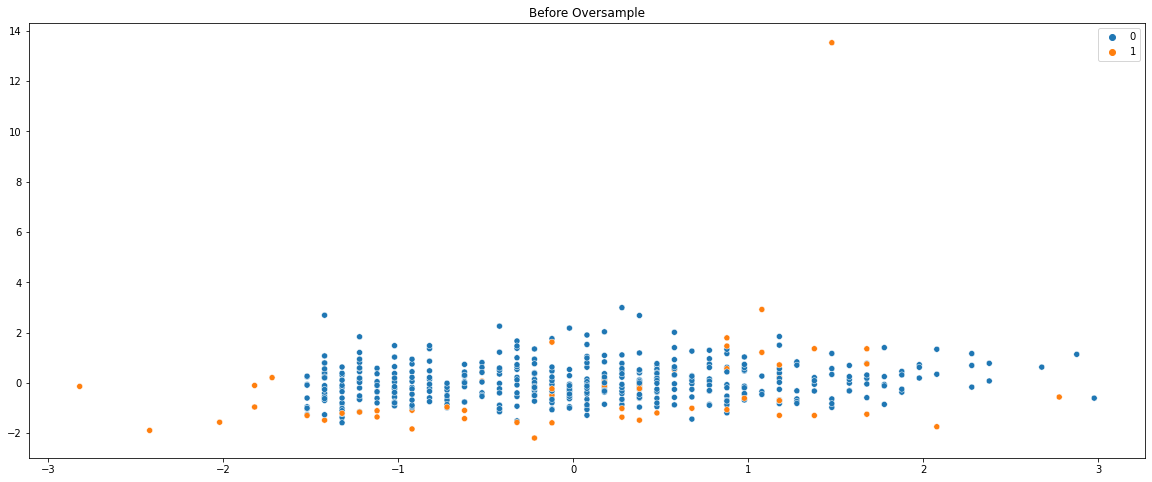

old_score: 0.8166323205383031
population_score: 0.8345007559512556
old_score: 0.8345007559512556
population_score: 0.8003517514824094
old_score: 0.8345007559512556
population_score: 0.8452023240136057
old_score: 0.8452023240136057
population_score: 0.6194915683620322
old_score: 0.8452023240136057
population_score: 0.7328941499754896
old_score: 0.8452023240136057
population_score: 0.6677418935378935
old_score: 0.8452023240136057
population_score: 0.6968808861841282
old_score: 0.8452023240136057
population_score: 0.7097587038102136
old_score: 0.8452023240136057
population_score: 0.6420834561338076
old_score: 0.8452023240136057
population_score: 0.7114548634078466
old_score: 0.8452023240136057
population_score: 0.6520558672933496
old_score: 0.8452023240136057
population_score: 0.7984317505325119
old_score: 0.8452023240136057
population_score: 0.7216315807683165
old_score: 0.8452023240136057
population_score: 0.7085862752750144
old_score: 0.8452023240136057
population_score: 0.816812662804

c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


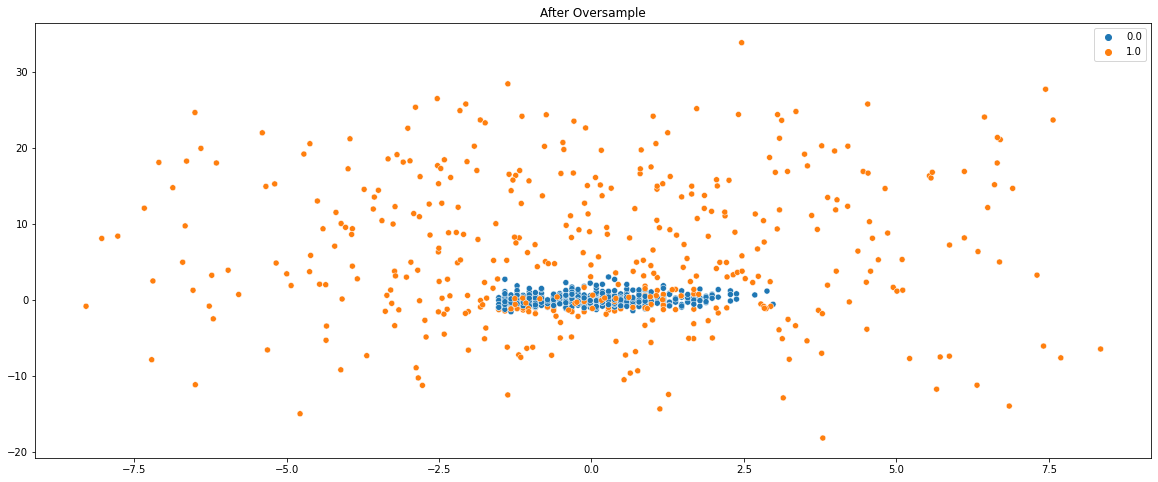

Best score GradientBoosting: 
0.982638888888889

_____________________________________________

Best score GradientBoosting AIS: 
0.9393713222568363

Best score KNeighbors: 
0.9942235813795446

_____________________________________________

Best score KNeighbors AIS: 
0.9077859986154379

Best score Logistic Regression: 
0.9445506286102616

_____________________________________________

Best score Logistic Regression AIS: 
0.9347414941521304

Best score RandomForest: 
0.987289755351682

Best score RandomForest AIS: 
0.9533575631706472



c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


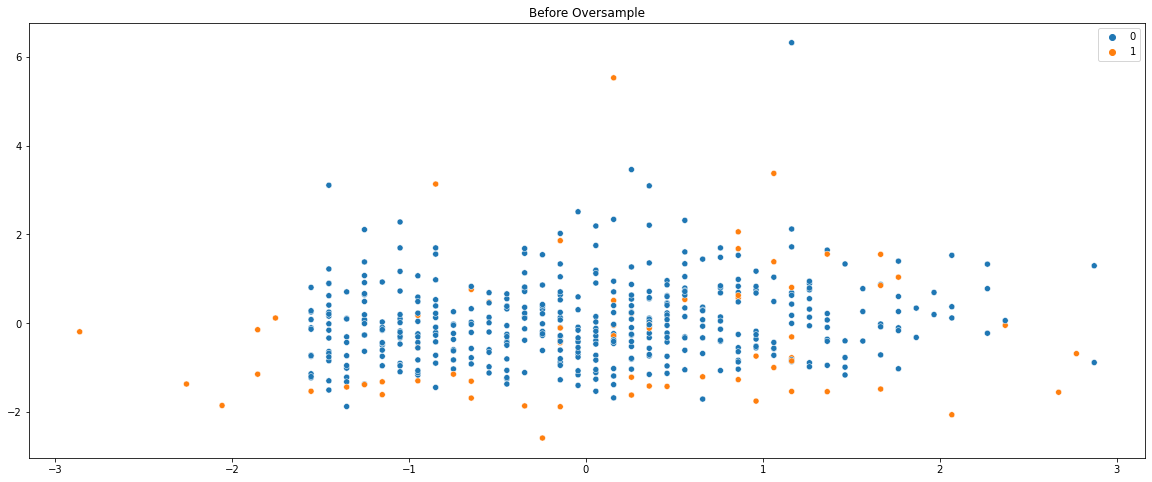

old_score: 0.8915788266593274
population_score: 0.9185114929738869
old_score: 0.9185114929738869
population_score: 0.8540882291898872
old_score: 0.9185114929738869
population_score: 0.8106555447432422
old_score: 0.9185114929738869
population_score: 0.8151673302437491
old_score: 0.9185114929738869
population_score: 0.8428887437564752
old_score: 0.9185114929738869
population_score: 0.7941461572241237
old_score: 0.9185114929738869
population_score: 0.8478201082804663
old_score: 0.9185114929738869
population_score: 0.8339730293359034
old_score: 0.9185114929738869
population_score: 0.8323975845292073
old_score: 0.9185114929738869
population_score: 0.8439774151979801
old_score: 0.9185114929738869
population_score: 0.8362604113175889
old_score: 0.9185114929738869
population_score: 0.8827091533435597
old_score: 0.9185114929738869
population_score: 0.9093097861166758
old_score: 0.9185114929738869
population_score: 0.7780436108159485
old_score: 0.9185114929738869
population_score: 0.876255906830

c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


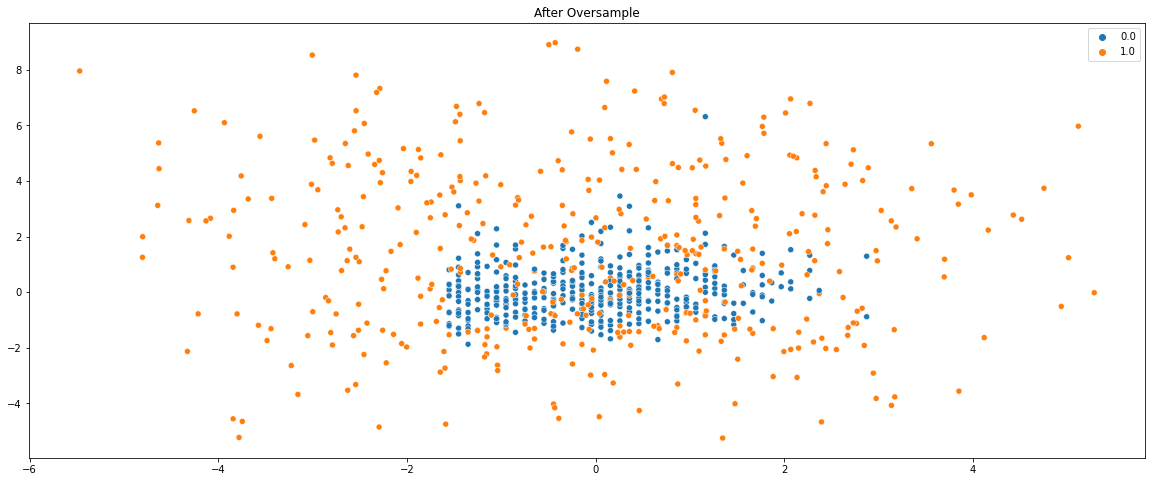

Best score GradientBoosting: 
0.9871274907423735

_____________________________________________

Best score GradientBoosting AIS: 
0.9234262034914478

Best score KNeighbors: 
0.9929796332216541

_____________________________________________

Best score KNeighbors AIS: 
0.9186651384235585

Best score Logistic Regression: 
0.945038353024158

_____________________________________________

Best score Logistic Regression AIS: 
0.9211007758772702

Best score RandomForest: 
0.9894639393405044

Best score RandomForest AIS: 
0.9506149709046023



c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


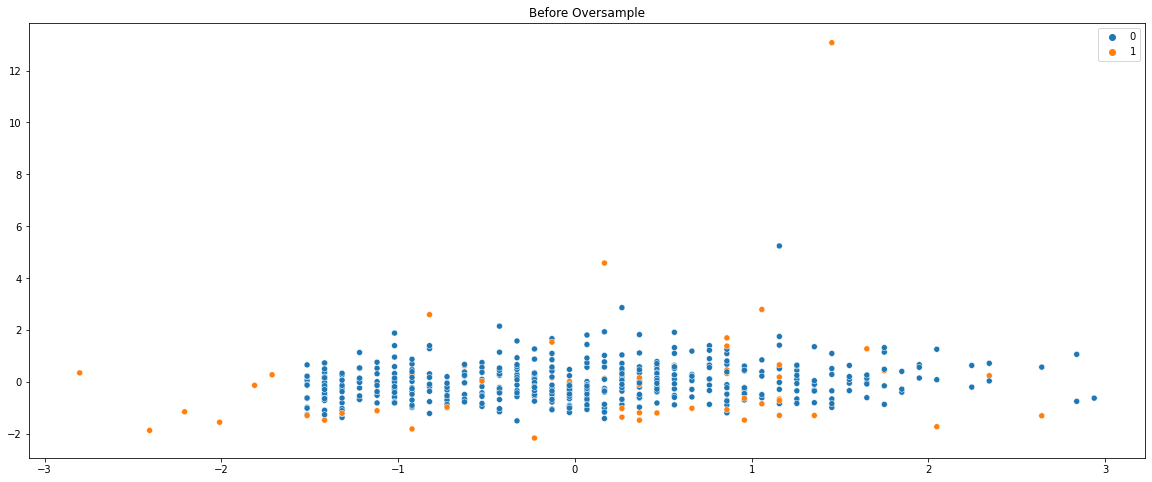

old_score: 0.8598844037415645
population_score: 0.8592171897065299
old_score: 0.8598844037415645
population_score: 0.8800895826370791
old_score: 0.8800895826370791
population_score: 0.8850831396449014
old_score: 0.8850831396449014
population_score: 0.7881890400242785
old_score: 0.8850831396449014
population_score: 0.7801280984876058
old_score: 0.8850831396449014
population_score: 0.6903738980650245
old_score: 0.8850831396449014
population_score: 0.7606103258021326
old_score: 0.8850831396449014
population_score: 0.7617622803693583
old_score: 0.8850831396449014
population_score: 0.8256747995787708
old_score: 0.8850831396449014
population_score: 0.7006321576353068
old_score: 0.8850831396449014
population_score: 0.8010924812948019
old_score: 0.8850831396449014
population_score: 0.761923698516991
old_score: 0.8850831396449014
population_score: 0.7739516944580893
old_score: 0.8850831396449014
population_score: 0.7820692609114278
old_score: 0.8850831396449014
population_score: 0.6995318127051

c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


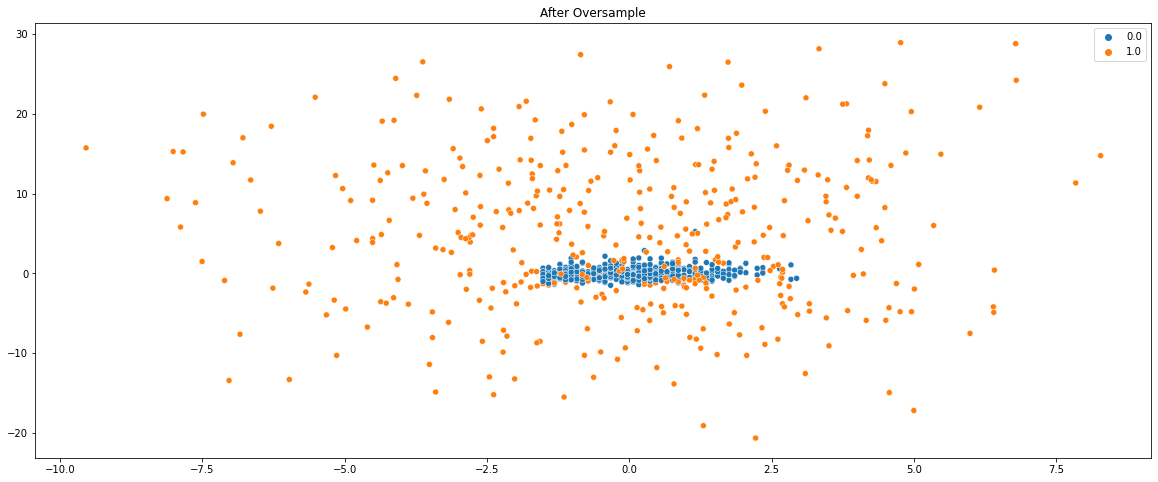

Best score GradientBoosting: 
0.987289755351682

_____________________________________________

Best score GradientBoosting AIS: 
0.9479379034998301

Best score KNeighbors: 
0.9884790180088345

_____________________________________________

Best score KNeighbors AIS: 
0.9143730886850152

Best score Logistic Regression: 
0.9469503907577302

_____________________________________________

Best score Logistic Regression AIS: 
0.9097965511382942

Best score RandomForest: 
0.9895833333333333

Best score RandomForest AIS: 
0.9549142031940197



c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


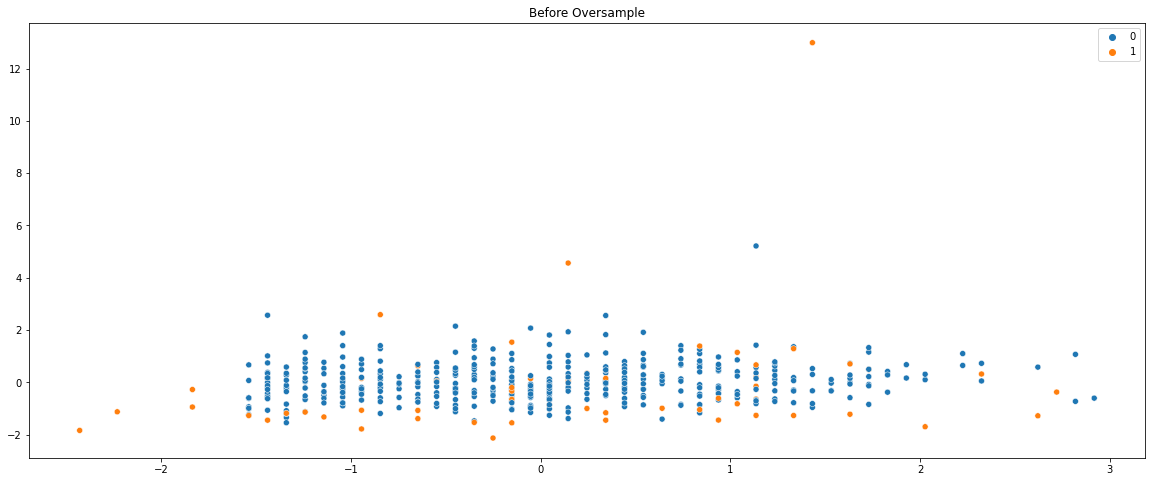

old_score: 0.8691028341487554
population_score: 0.8792838523483685
old_score: 0.8792838523483685
population_score: 0.8348746024473328
old_score: 0.8792838523483685
population_score: 0.8730001566108647
old_score: 0.8792838523483685
population_score: 0.8383219645323873
old_score: 0.8792838523483685
population_score: 0.7690822991269816
old_score: 0.8792838523483685
population_score: 0.8671890523613721
old_score: 0.8792838523483685
population_score: 0.8463406000365443
old_score: 0.8792838523483685
population_score: 0.856473902847744
old_score: 0.8792838523483685
population_score: 0.8828890826192343
old_score: 0.8828890826192343
population_score: 0.8332342592443146
old_score: 0.8828890826192343
population_score: 0.7220101814762009
old_score: 0.8828890826192343
population_score: 0.685075836104329
old_score: 0.8828890826192343
population_score: 0.7479754380808641
old_score: 0.8828890826192343
population_score: 0.7083297529282531
old_score: 0.8828890826192343
population_score: 0.66326410386973

c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


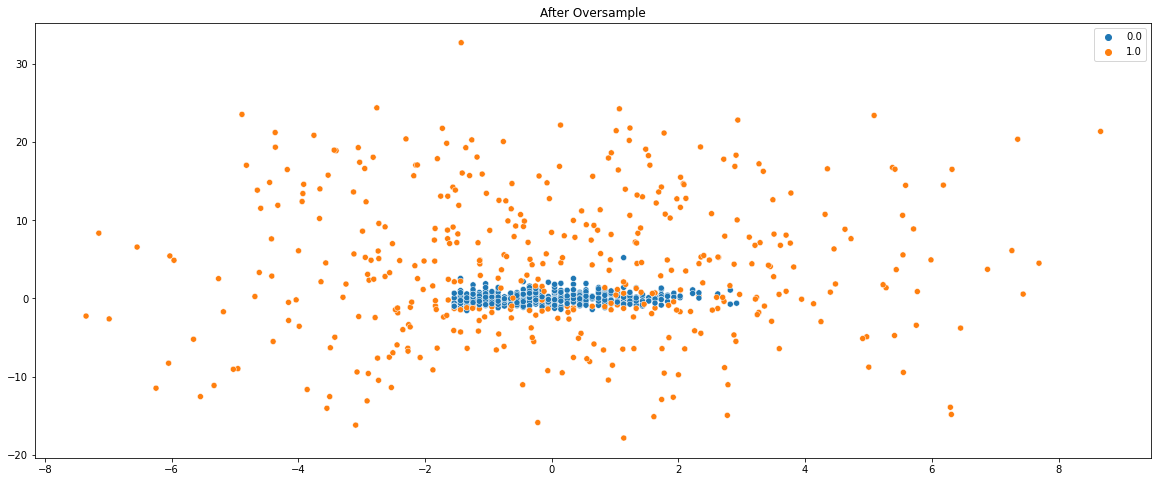

Best score GradientBoosting: 
0.9907619775739042

_____________________________________________

Best score GradientBoosting AIS: 
0.9456230886850153

Best score KNeighbors: 
0.9930874108053007

_____________________________________________

Best score KNeighbors AIS: 
0.9051032110091743

Best score Logistic Regression: 
0.9758112470268434

_____________________________________________

Best score Logistic Regression AIS: 
0.9074817363234795

Best score RandomForest: 
0.9930767923887189

Best score RandomForest AIS: 
0.9641416072035338



c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


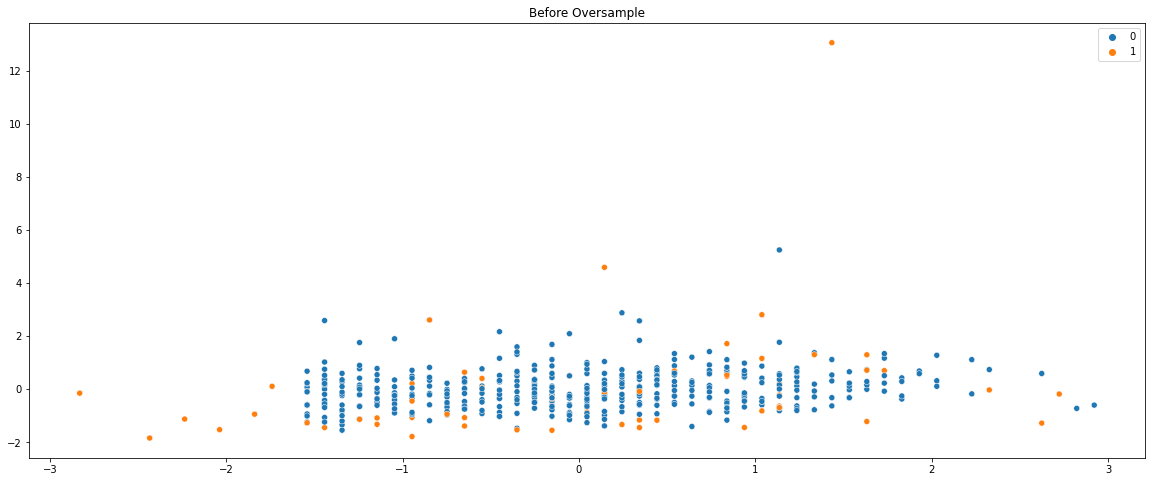

old_score: 0.8595563460442154
population_score: 0.8494767786407097
old_score: 0.8595563460442154
population_score: 0.8110212219766602
old_score: 0.8595563460442154
population_score: 0.8194415267572012
old_score: 0.8595563460442154
population_score: 0.801219074369618
old_score: 0.8595563460442154
population_score: 0.8718681071786726
old_score: 0.8718681071786726
population_score: 0.7711295032451637
old_score: 0.8718681071786726
population_score: 0.8301412688698491
old_score: 0.8718681071786726
population_score: 0.8070929716086249
old_score: 0.8718681071786726
population_score: 0.7290177140936088
old_score: 0.8718681071786726
population_score: 0.7960211946050096
old_score: 0.8718681071786726
population_score: 0.754973855410568
old_score: 0.8718681071786726
population_score: 0.754094103407533
old_score: 0.8718681071786726
population_score: 0.756722728437569
old_score: 0.8718681071786726
population_score: 0.8788182372718442
old_score: 0.8788182372718442
population_score: 0.7495754724706962

c:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


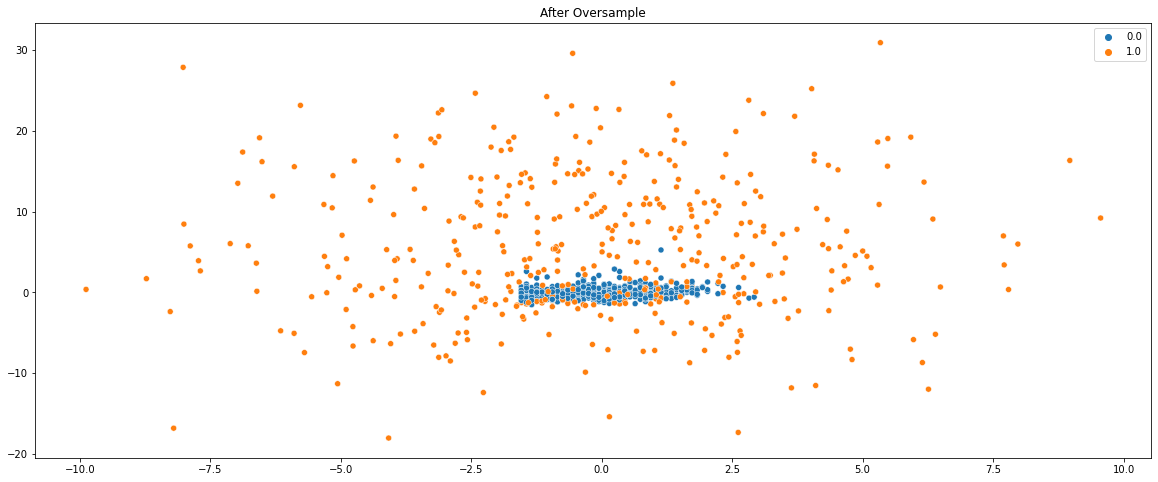

Best score GradientBoosting: 
0.9884259259259259

_____________________________________________

Best score GradientBoosting AIS: 
0.9479166666666667

Best score KNeighbors: 
0.9884259259259259

_____________________________________________

Best score KNeighbors AIS: 
0.9050925925925926

Best score Logistic Regression: 
0.9571759259259259

_____________________________________________

Best score Logistic Regression AIS: 
0.9293981481481481

Best score RandomForest: 
0.9907407407407407

Best score RandomForest AIS: 
0.9525462962962963



In [25]:
kf = KFold(n_splits=5)
dataAIS = []
dataSMOTE = []
dataBase = []
data = []
fold = 0
paramEntry = "max_rounds = 100, stopping_cond = 30, model = kNeighbors,K_folds = 5,scorer = 'f1',min_change = 0.001, use_lof = True"
for result in kf.split(df):
    fold = fold+1

    #Print the shape of the train and test set
    data_train = df.iloc[result[0]]
    data_test =  df.iloc[result[1]]

    label_train = data_train.copy()
    label_train = label_train.drop(['Age','Sex','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT','split'],axis=1) #Drop all except category for the train df
 
    label_test = data_test.copy()
    label_test = label_test.drop(['Age','Sex','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT','split'],axis=1) #Drop all except category for the train df
   
    train_df = data_train.copy()
    train_df = train_df.drop(['category'],axis=1)
    numerical_attribute_train = train_df.drop(['split','Sex'],axis=1)
    
    num_pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('std_scaler', StandardScaler()),
    ])

    num_attribs = list(numerical_attribute_train)
    cat_attribs = ["Sex"]

    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])


    data_prepared_train = pd.DataFrame(full_pipeline.fit_transform(train_df),columns=train_df.columns, index=train_df.index)
    rejoin_train = pd.concat([data_prepared_train,label_train],axis=1)

    test_df = data_test.drop(['category'],axis=1) #We chose KNN for the actual impuation
    num_pipeline_test = Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('std_scaler', StandardScaler()),
    ])
    cat_attribs_test = ['split',"Sex"]
    numerical_attr_test = test_df.drop(['Sex'],axis=1)
    numerical_attr_test = list(numerical_attr_test)

    full_pipeline_test = ColumnTransformer([
        ("num", num_pipeline_test, numerical_attr_test),
        ("cat", OneHotEncoder(), cat_attribs_test),
    ])

    data_prepared_test = pd.DataFrame(full_pipeline.fit_transform(test_df),columns=test_df.columns, index=test_df.index)
    rejoin_test = pd.concat([data_prepared_test,label_test],axis=1)
   
    
    data_train_AIS = rejoin_train.copy()
    data_train_SMOTE = rejoin_train.copy()

    data_train_AIS = data_train_AIS.drop(['split'],axis=1)
    data_train_SMOTE = data_train_SMOTE.drop(['split'],axis=1)

    data_train = rejoin_train.copy()
    data_test = rejoin_test.copy()

    f, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(20,8))
    sns.scatterplot(data_train_AIS.drop(["category"], axis=1).values[:,0],data_train_AIS.drop(["category"], axis=1).values[:,2], hue=data_train_AIS.drop(data_train_AIS.columns[0:-1],axis=1).values.ravel(),ax=ax1)
    ax1.set_title("Before Oversample")
    plt.show()


    data_train = data_train.drop(['split'],axis=1)
    data_test = data_test.drop(['split'],axis=1)
    #Create an oversampling object
   
    oversample = SMOTE()
    randomForest = RandomForestClassifier()
    logisticRegression = LogisticRegression()
    kNeighbors = KNeighborsClassifier()
    gradientBoosting = GradientBoostingClassifier()


    oversample_AIS = ArtificialImmuneSystem()
    #Oversample and add to the dataframe to fix the class imbalance
    logisticRegression = LogisticRegression()
    st = time.time()
    x_over, y_over = oversample.fit_resample(data_train_SMOTE.drop(["category"], axis=1), data_train_SMOTE.drop(data_train_SMOTE.columns[0:-1],axis=1))
    elapsed_time_SMOTE = time.time() - st

    st = time.time()
    input_x_over_AIS, y_over_AIS = oversample_AIS.AIS_Resample(data_train_AIS.drop(["category"], axis=1), data_train_AIS.drop(data_train_AIS.columns[0:-1],axis=1), max_rounds = 100, stopping_cond = 30, model = kNeighbors,K_folds = 5,scorer = 'f1',min_change = 0.001, use_lof = True)
    elapsed_time_AIS = time.time() - st

    smote_df = pd.concat([x_over, y_over], axis=1)
    ais_df = pd.concat([input_x_over_AIS, y_over_AIS], axis=1)

    f, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(20,8))
    sns.scatterplot(ais_df.drop(["category"], axis=1).values[:,0],ais_df.drop(["category"], axis=1).values[:,2], hue=ais_df.drop(ais_df.columns[0:-1],axis=1).values.ravel(),ax=ax1)
    ax1.set_title("After Oversample")
    plt.show()

    # print the dimensionality of the oversampled dataset
    #print(f"SMOTE Oversampled Data shape: \n{smote_df.shape}\n")
    #print(f"SMOTE Oversampled Data size: \n{smote_df.size}\n")
    #print(f"SMOTE Oversampled Data ndim: \n{smote_df.ndim}\n")
    #print("_____________________________________________\n")

    # print the dimensionality of the oversampled dataset
    #print(f"AIS Oversampled Data shape: \n{ais_df.shape}\n")
    #print(f"AIS Oversampled Data size: \n{ais_df.size}\n")
    #print(f"AIS Oversampled Data ndim: \n{ais_df.ndim}\n")
    #print("_____________________________________________\n")


    # print the new class distribution using a Counter
    #print(f"New SMOTE Class Distribution: {Counter(smote_df['5'])}")
    #print(f"New AIS Class Distribution: {Counter(ais_df['5'])}")
    ## print the new class distribution using a Counter
    #print(f"Old Class Distribution: {Counter(data_train['5'])}")

    #print("_____________________________________________\n")

    #labelTrainFlat = labels_train.values.ravel()

    #Fit one vs rest Gradient Boosting classification
    gradientBoosting = GradientBoostingClassifier()
    gradientBoosting = gradientBoosting.fit(x_over, y_over.values.ravel())

    gradientBoosting_AIS = GradientBoostingClassifier()
    gradientBoosting_AIS = gradientBoosting.fit(input_x_over_AIS, y_over_AIS.values.ravel())

    gradientBoosting_Base = gradientBoosting.fit(data_train.drop(["category"], axis=1), data_train.drop(data_train.columns[0:-1],axis=1).values.ravel())

    #Fit RandomForestClassifier classification
    randomForest = RandomForestClassifier()
    randomForest = randomForest.fit(x_over,y_over.values.ravel())

    randomForest = RandomForestClassifier()
    randomForest_AIS  = randomForest.fit(input_x_over_AIS,y_over_AIS.values.ravel())

    randomForest_Base = randomForest.fit(data_train.drop(["category"], axis=1), data_train.drop(data_train.columns[0:-1],axis=1).values.ravel())
    #randomForest_Base  = randomForest.fit(data_train.drop(["5"], axis=1), data_train.drop(data_train_AIS.columns[0:-1]).values.ravel())

    #Create a KNeighbors classification object
    kNeighbors = KNeighborsClassifier()
    kNeighbors = kNeighbors.fit(x_over,y_over.values.ravel())

    kNeighbors = KNeighborsClassifier()
    kNeighbors_AIS  = kNeighbors.fit(input_x_over_AIS,y_over_AIS.values.ravel())
    kNeighbors_Base = kNeighbors.fit(data_train.drop(["category"], axis=1), data_train.drop(data_train.columns[0:-1],axis=1).values.ravel())
    #kNeighbors_base  = kNeighbors.fit(data_train.drop(["5"], axis=1), data_train.drop(data_train_AIS.columns[0:-1]).values.ravel())

    #Create an LogisticRegression object
    logisticRegression = LogisticRegression(max_iter=5000)
    logisticRegression = logisticRegression.fit(x_over,y_over.values.ravel())

    logisticRegression = LogisticRegression(max_iter=5000)
    logisticRegression_AIS  = logisticRegression.fit(input_x_over_AIS,y_over_AIS.values.ravel())
    logisticRegression_Base = logisticRegression.fit(data_train.drop(["category"], axis=1), data_train.drop(data_train.columns[0:-1],axis=1).values.ravel())
    #logisticRegression_Base  = logisticRegression.fit(data_train.drop(["5"], axis=1), data_train.drop(data_train_AIS.columns[0:-1]).values.ravel())

    #Set the parameters of GradientBoosting for GridSearchCV
    parametersGradientBoosting = [
        {'learning_rate': [0.10,0.30,0.40],'min_samples_leaf': [4,8,15,20],'min_samples_split': [5,10,15,20], 'n_estimators': [10,30,40,50,60]}
    ]

    #Set the scoring parameters
    scoringX = {"roc_auc": "roc_auc", "bal_accuracy": "balanced_accuracy","accuracy": "accuracy","F1_macro": "f1_macro"}

    #Preform Gridsearch to find best parameters
    grid_searchGradientBoosting = GridSearchCV(gradientBoosting, parametersGradientBoosting, cv=4, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')
    grid_searchGradientBoosting_AIS = GridSearchCV(gradientBoosting_AIS, parametersGradientBoosting, cv=4, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')
    #grid_searchGradientBoosting_Base = GridSearchCV(gradientBoosting_Base, parametersGradientBoosting, cv=4, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')
    #Fit the GradientBoosting 
    grid_searchGradientBoosting.fit(x_over, y_over.values.ravel())
    grid_searchGradientBoosting_AIS.fit(input_x_over_AIS,y_over_AIS.values.ravel())
  
    

    #Print GridSearchCV Results
    
    print(f"Best score GradientBoosting: \n{grid_searchGradientBoosting.best_score_}\n")
    print("_____________________________________________\n")
    
    print(f"Best score GradientBoosting AIS: \n{grid_searchGradientBoosting_AIS.best_score_}\n")

    #Set the parameters of KNeighbors for GridSearchCV
    parametersKNeighbors = [
        {'n_neighbors': [1,5,10,15],'weights':['uniform', 'distance'],'algorithm':['auto'], 'p': [1,5,10]}
    ]

    #Set the scoring parameters
    #scoringX = {"roc_auc": "roc_auc", "bal_accuracy": "balanced_accuracy"}

    #Preform KNeighbors to find best parameters
    grid_searchKNeighbors = GridSearchCV(kNeighbors, parametersKNeighbors, cv=4, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')
    grid_searchKNeighbors_AIS = GridSearchCV(kNeighbors_AIS, parametersKNeighbors, cv=4, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')

    #Fit the KNeighbors 
    grid_searchKNeighbors.fit(x_over, y_over.values.ravel())
    grid_searchKNeighbors_AIS.fit(input_x_over_AIS,y_over_AIS.values.ravel())

    #Print GridSearchCV Results
   
    print(f"Best score KNeighbors: \n{grid_searchKNeighbors.best_score_}\n")
    print("_____________________________________________\n")
   
    print(f"Best score KNeighbors AIS: \n{grid_searchKNeighbors_AIS.best_score_}\n")
    
    #Set the parameters of LogisticRegression for GridSearchCV
    parametersLogisticRegression = [
        {'multi_class': ['ovr'],'penalty':['none','l2'], 'C': [1,5,10]}
    ]
    #scoringX = {"roc_auc": "roc_auc", "bal_accuracy": "balanced_accuracy"}

    #Preform LogisticRegression to find best parameters
    grid_searchLogisticRegression = GridSearchCV(logisticRegression, parametersLogisticRegression, cv=4, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')
    grid_searchLogisticRegression_AIS = GridSearchCV(logisticRegression_AIS, parametersLogisticRegression, cv=4, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')

    #Fit the LogisticRegression 
    grid_searchLogisticRegression.fit(x_over, y_over.values.ravel())
    grid_searchLogisticRegression_AIS.fit(input_x_over_AIS,y_over_AIS.values.ravel())

    #Print LogisticRegression Results
    
    print(f"Best score Logistic Regression: \n{grid_searchLogisticRegression.best_score_}\n")
    print("_____________________________________________\n")
   
    print(f"Best score Logistic Regression AIS: \n{grid_searchLogisticRegression_AIS.best_score_}\n")

    #Set the parameters of RandomForest for GridSearchCV
    parametersRandomForest = [
        {'n_estimators': [50,100,150,200],'max_depth': [5,10,15,20], 'bootstrap': [True, False],
        'min_samples_split': [0.05,2,5,10], 'max_features': ['sqrt']}
    ]

    #Preform Gridsearch to find best parameters
    grid_searchRandomForest = GridSearchCV(randomForest, parametersRandomForest, cv=4, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')
    grid_searchRandomForest_AIS = GridSearchCV(randomForest_AIS, parametersRandomForest, cv=4, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')

    #Fit the RandomForest 
    grid_searchRandomForest.fit(x_over, y_over.values.ravel())
    grid_searchRandomForest_AIS.fit(input_x_over_AIS,y_over_AIS.values.ravel())

    #Print GridSearchCV Results

    print(f"Best score RandomForest: \n{grid_searchRandomForest.best_score_}\n")

    print(f"Best score RandomForest AIS: \n{grid_searchRandomForest_AIS.best_score_}\n")

    #Get the results for all classifiers 
    cross_val_resultsGB = grid_searchGradientBoosting.cv_results_
    cross_val_resultsRF = grid_searchRandomForest.cv_results_
    cross_val_resultsLR = grid_searchLogisticRegression.cv_results_
    cross_val_resultsKN = grid_searchKNeighbors.cv_results_

    cross_val_resultsGB_AIS = grid_searchGradientBoosting_AIS.cv_results_
    cross_val_resultsRF_AIS = grid_searchRandomForest_AIS.cv_results_
    cross_val_resultsLR_AIS = grid_searchLogisticRegression_AIS.cv_results_
    cross_val_resultsKN_AIS = grid_searchKNeighbors_AIS.cv_results_


    #Print the results of all classiifiers
    #GBC
    mean_test_roc_aucGB = mean(cross_val_resultsGB['mean_test_roc_auc'])
    mean_test_bal_accuracyGB = mean(cross_val_resultsGB['mean_test_bal_accuracy'])
    
    mean_test_roc_aucGB_AIS = mean(cross_val_resultsGB_AIS['mean_test_roc_auc'])
    mean_test_bal_accuracyGB_AIS = mean(cross_val_resultsGB_AIS['mean_test_bal_accuracy'])
   
    #RFC
    mean_test_roc_aucRF = mean(cross_val_resultsRF['mean_test_roc_auc'])
    mean_test_bal_accuracyRF = mean(cross_val_resultsRF['mean_test_bal_accuracy'])
    
    mean_test_roc_aucRF_AIS = mean(cross_val_resultsRF_AIS['mean_test_roc_auc'])
    mean_test_bal_accuracyRF_AIS = mean(cross_val_resultsRF_AIS['mean_test_bal_accuracy'])
    #LRC
    mean_test_roc_aucLR = mean(cross_val_resultsLR['mean_test_roc_auc'])
    mean_test_bal_accuracyLR = mean(cross_val_resultsLR['mean_test_bal_accuracy'])
    
    mean_test_roc_aucLR_AIS = mean(cross_val_resultsLR_AIS['mean_test_roc_auc'])
    mean_test_bal_accuracyLR_AIS = mean(cross_val_resultsLR_AIS['mean_test_bal_accuracy'])

    #KNC
    mean_test_roc_aucKN = mean(cross_val_resultsKN['mean_test_roc_auc'])
    mean_test_bal_accuracyKN = mean(cross_val_resultsKN['mean_test_bal_accuracy'])
    
    mean_test_roc_aucKN_AIS = mean(cross_val_resultsKN_AIS['mean_test_roc_auc'])
    mean_test_bal_accuracyKN_AIS = mean(cross_val_resultsKN_AIS['mean_test_bal_accuracy'])

    predictions_test_over_GB = grid_searchGradientBoosting.best_estimator_.predict(data_test.drop(["category"],axis=1))
    predictions_test_over_RF = grid_searchRandomForest.best_estimator_.predict(data_test.drop(["category"],axis=1))
    predictions_test_over_LR = grid_searchLogisticRegression.best_estimator_.predict(data_test.drop(["category"],axis=1))
    predictions_test_over_KN = grid_searchKNeighbors.best_estimator_.predict(data_test.drop(["category"],axis=1))

    predictions_test_over_GB_AIS = grid_searchGradientBoosting_AIS.best_estimator_.predict(data_test.drop(["category"],axis=1))
    predictions_test_over_RF_AIS = grid_searchRandomForest_AIS.best_estimator_.predict(data_test.drop(["category"],axis=1))
    predictions_test_over_LR_AIS = grid_searchLogisticRegression_AIS.best_estimator_.predict(data_test.drop(["category"],axis=1))
    predictions_test_over_KN_AIS = grid_searchKNeighbors_AIS.best_estimator_.predict(data_test.drop(["category"],axis=1))

    predictions_GB = gradientBoosting_Base.predict(data_test.drop(["category"],axis=1))
    predictions_RF = randomForest_Base.predict(data_test.drop(["category"],axis=1))
    predictions_LR = logisticRegression_Base.predict(data_test.drop(["category"],axis=1))
    predictions_KN = kNeighbors_Base.predict(data_test.drop(["category"],axis=1))

    f1_score_GB = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_GB)
    f1_score_RF = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_RF)
    f1_score_LR = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_LR)
    f1_score_KN = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_KN)

    f1_score_GB_AIS = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_GB_AIS) 
    f1_score_RF_AIS = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_RF_AIS)
    f1_score_LR_AIS = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_LR_AIS)
    f1_score_KN_AIS = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_KN_AIS)

    f1_score_GB_Base = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_GB)
    f1_score_RF_Base = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_RF)
    f1_score_LR_Base = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_LR)
    f1_score_KN_Base = f1_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_KN)

    geometric_mean_score_GB = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_GB, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_RF = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_RF, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_LR = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_LR, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_KN = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_KN, labels=None, pos_label=1, average='binary',)

    geometric_mean_score_GB_AIS = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_GB_AIS, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_RF_AIS = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_RF_AIS, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_LR_AIS = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_LR_AIS, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_KN_AIS = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_KN_AIS, labels=None, pos_label=1, average='binary',)

    geometric_mean_score_GB_Base = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_GB, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_RF_Base = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_RF, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_LR_Base = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_LR, labels=None, pos_label=1, average='binary',)
    geometric_mean_score_KN_Base = geometric_mean_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_KN, labels=None, pos_label=1, average='binary',)

    
    roc_auc_GB_AIS = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_GB_AIS)
    roc_auc_RF_AIS = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_RF_AIS)
    roc_auc_LR_AIS = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_LR_AIS)
    roc_auc_KN_AIS = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_KN_AIS)
 
    roc_auc_GB_Base = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_GB)
    roc_auc_RF_Base = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_RF)
    roc_auc_LR_Base = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_LR)
    roc_auc_KN_Base = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_KN)

    roc_auc_GB = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_GB)
    roc_auc_RF = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_RF)
    roc_auc_LR = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_LR)
    roc_auc_KN = roc_auc_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_KN)

    

    balanced_acc_GB_AIS = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_GB_AIS)
    balanced_acc_RF_AIS = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_RF_AIS)
    balanced_acc_LR_AIS = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_LR_AIS)
    balanced_acc_KN_AIS = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_KN_AIS)
 
    balanced_acc_GB = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_GB)
    balanced_acc_RF = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_RF)
    balanced_acc_LR = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_LR)
    balanced_acc_KN = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_test_over_KN)

    
    balanced_acc_GB_Base = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_GB)
    balanced_acc_RF_Base = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_RF)
    balanced_acc_LR_Base = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_LR)
    balanced_acc_KN_Base = balanced_accuracy_score(data_test.drop(data_test.columns[0:-1],axis=1), predictions_KN)

    
    dataAIS.append( [fold,dataset,"AIS", elapsed_time_AIS,paramEntry, roc_auc_GB_AIS, roc_auc_RF_AIS, roc_auc_LR_AIS, roc_auc_KN_AIS, balanced_acc_GB_AIS, balanced_acc_RF_AIS,  balanced_acc_LR_AIS,  balanced_acc_KN_AIS, geometric_mean_score_GB_AIS, geometric_mean_score_RF_AIS, geometric_mean_score_LR_AIS, geometric_mean_score_KN_AIS,f1_score_GB_AIS,f1_score_RF_AIS,f1_score_LR_AIS,f1_score_KN_AIS ])
    dataSMOTE.append([fold,dataset,"SMOTE", elapsed_time_SMOTE,"NA", roc_auc_GB,  roc_auc_RF, roc_auc_LR,roc_auc_KN, balanced_acc_GB, balanced_acc_RF,  balanced_acc_LR,  balanced_acc_KN, geometric_mean_score_GB, geometric_mean_score_RF, geometric_mean_score_LR, geometric_mean_score_KN,f1_score_GB,f1_score_RF,f1_score_LR,f1_score_KN])
    dataBase.append([fold,dataset,"BASE", "NA","NA", roc_auc_GB_Base, roc_auc_RF_Base, roc_auc_LR_Base, roc_auc_KN_Base, balanced_acc_GB_Base, balanced_acc_RF_Base,balanced_acc_LR_Base,  balanced_acc_KN_Base, geometric_mean_score_GB_Base, geometric_mean_score_RF_Base, geometric_mean_score_LR_Base, geometric_mean_score_KN_Base,f1_score_GB_Base,f1_score_RF_Base,f1_score_LR_Base,f1_score_KN_Base])
    data.append(dataAIS[fold-1])
    data.append(dataSMOTE[fold-1])
    data.append(dataBase[fold-1])
    data.append(["","","","","","","","","","","","","","","","","","","","",""])

average_AIS_Runtime = 0

average_roc_auc_GB_AIS = 0
average_roc_auc_RF_AIS = 0
average_roc_auc_LR_AIS = 0
average_roc_auc_KN_AIS = 0

average_balanced_acc_GB_AIS = 0
average_balanced_acc_RF_AIS = 0
average_balanced_acc_LR_AIS = 0
average_balanced_acc_KN_AIS = 0

average_geometric_mean_score_GB_AIS = 0
average_geometric_mean_score_RF_AIS = 0
average_geometric_mean_score_LR_AIS = 0
average_geometric_mean_score_KN_AIS = 0
    
average_f1_score_GB_AIS = 0
average_f1_score_RF_AIS = 0
average_f1_score_LR_AIS = 0
average_f1_score_KN_AIS = 0


average_SMOTE_Runtime = 0

average_roc_auc_GB = 0
average_roc_auc_RF = 0
average_roc_auc_LR = 0
average_roc_auc_KN = 0

average_balanced_acc_GB = 0
average_balanced_acc_RF = 0
average_balanced_acc_LR = 0
average_balanced_acc_KN = 0

average_geometric_mean_score_GB = 0
average_geometric_mean_score_RF = 0
average_geometric_mean_score_LR = 0
average_geometric_mean_score_KN = 0
    
average_f1_score_GB = 0
average_f1_score_RF = 0
average_f1_score_LR = 0
average_f1_score_KN = 0

average_roc_auc_GB_Base = 0
average_roc_auc_RF_Base = 0
average_roc_auc_LR_Base = 0
average_roc_auc_KN_Base = 0

average_balanced_acc_GB_Base = 0
average_balanced_acc_RF_Base = 0
average_balanced_acc_LR_Base = 0
average_balanced_acc_KN_Base = 0

average_geometric_mean_score_GB_Base = 0
average_geometric_mean_score_RF_Base = 0
average_geometric_mean_score_LR_Base = 0
average_geometric_mean_score_KN_Base = 0
    
average_f1_score_GB_Base = 0
average_f1_score_RF_Base = 0
average_f1_score_LR_Base = 0
average_f1_score_KN_Base = 0

for array in dataAIS:

    average_AIS_Runtime = average_AIS_Runtime + array[3]

    average_roc_auc_GB_AIS = average_roc_auc_GB_AIS + array[5]
    average_roc_auc_RF_AIS = average_roc_auc_RF_AIS + array[6]
    average_roc_auc_LR_AIS = average_roc_auc_LR_AIS + array[7]
    average_roc_auc_KN_AIS = average_roc_auc_KN_AIS + array[8]

    average_balanced_acc_GB_AIS = average_balanced_acc_GB_AIS + array[9]
    average_balanced_acc_RF_AIS = average_balanced_acc_RF_AIS + array[10]
    average_balanced_acc_LR_AIS = average_balanced_acc_LR_AIS + array[11]
    average_balanced_acc_KN_AIS = average_balanced_acc_KN_AIS + array[12]

    average_geometric_mean_score_GB_AIS = average_geometric_mean_score_GB_AIS + array[13]
    average_geometric_mean_score_RF_AIS = average_geometric_mean_score_RF_AIS + array[14]
    average_geometric_mean_score_LR_AIS = average_geometric_mean_score_LR_AIS + array[15]
    average_geometric_mean_score_KN_AIS = average_geometric_mean_score_KN_AIS + array[16]
    
    average_f1_score_GB_AIS = average_f1_score_GB_AIS + array[17]
    average_f1_score_RF_AIS = average_f1_score_RF_AIS + array[18]
    average_f1_score_LR_AIS = average_f1_score_LR_AIS + array[19]
    average_f1_score_KN_AIS = average_f1_score_KN_AIS + array[20]

for array in dataSMOTE:

    average_SMOTE_Runtime = average_SMOTE_Runtime + array[3]

    average_roc_auc_GB = average_roc_auc_GB + array[5]
    average_roc_auc_RF = average_roc_auc_RF + array[6]
    average_roc_auc_LR = average_roc_auc_LR + array[7]
    average_roc_auc_KN = average_roc_auc_KN + array[8]

    average_balanced_acc_GB = average_balanced_acc_GB + array[9]
    average_balanced_acc_RF = average_balanced_acc_RF + array[10]
    average_balanced_acc_LR = average_balanced_acc_LR + array[11]
    average_balanced_acc_KN = average_balanced_acc_KN + array[12]

    average_geometric_mean_score_GB = average_geometric_mean_score_GB + array[13]
    average_geometric_mean_score_RF = average_geometric_mean_score_RF + array[14]
    average_geometric_mean_score_LR = average_geometric_mean_score_LR + array[15]
    average_geometric_mean_score_KN = average_geometric_mean_score_KN + array[16]
    
    average_f1_score_GB = average_f1_score_GB + array[17]
    average_f1_score_RF = average_f1_score_RF + array[18]
    average_f1_score_LR = average_f1_score_LR + array[19]
    average_f1_score_KN = average_f1_score_KN + array[20]

for array in dataBase:

    average_roc_auc_GB_Base = average_roc_auc_GB_Base + array[5]
    average_roc_auc_RF_Base = average_roc_auc_RF_Base + array[6]
    average_roc_auc_LR_Base = average_roc_auc_LR_Base + array[7]
    average_roc_auc_KN_Base = average_roc_auc_KN_Base + array[8]

    average_balanced_acc_GB_Base = average_balanced_acc_GB_Base + array[9]
    average_balanced_acc_RF_Base = average_balanced_acc_RF_Base + array[10]
    average_balanced_acc_LR_Base = average_balanced_acc_LR_Base + array[11]
    average_balanced_acc_KN_Base = average_balanced_acc_KN_Base + array[12]

    average_geometric_mean_score_GB_Base = average_geometric_mean_score_GB_Base + array[13]
    average_geometric_mean_score_RF_Base = average_geometric_mean_score_RF_Base + array[14]
    average_geometric_mean_score_LR_Base = average_geometric_mean_score_LR_Base + array[15]
    average_geometric_mean_score_KN_Base = average_geometric_mean_score_KN_Base + array[16]
    
    average_f1_score_GB_Base = average_f1_score_GB_Base + array[17]
    average_f1_score_RF_Base = average_f1_score_RF_Base + array[18]
    average_f1_score_LR_Base = average_f1_score_LR_Base + array[19]
    average_f1_score_KN_Base = average_f1_score_KN_Base + array[20]

average_f1_score_GB = average_f1_score_GB / fold
average_f1_score_RF = average_f1_score_RF / fold
average_f1_score_LR = average_f1_score_LR / fold
average_f1_score_KN= average_f1_score_KN / fold

average_f1_score_GB_AIS = average_f1_score_GB_AIS / fold
average_f1_score_RF_AIS = average_f1_score_RF_AIS / fold
average_f1_score_LR_AIS = average_f1_score_LR_AIS / fold
average_f1_score_KN_AIS = average_f1_score_KN_AIS / fold

average_f1_score_GB_Base = average_f1_score_GB_Base / fold
average_f1_score_RF_Base = average_f1_score_RF_Base / fold
average_f1_score_LR_Base = average_f1_score_LR_Base / fold
average_f1_score_KN_Base= average_f1_score_KN_Base / fold

average_geometric_mean_score_GB = average_geometric_mean_score_GB / fold
average_geometric_mean_score_RF= average_geometric_mean_score_RF / fold
average_geometric_mean_score_LR= average_geometric_mean_score_LR / fold
average_geometric_mean_score_KN = average_geometric_mean_score_KN / fold

average_geometric_mean_score_GB_AIS= average_geometric_mean_score_GB_AIS / fold
average_geometric_mean_score_RF_AIS= average_geometric_mean_score_RF_AIS / fold
average_geometric_mean_score_LR_AIS = average_geometric_mean_score_LR_AIS / fold
average_geometric_mean_score_KN_AIS = average_geometric_mean_score_KN_AIS / fold

average_geometric_mean_score_GB_Base = average_geometric_mean_score_GB_Base / fold
average_geometric_mean_score_RF_Base= average_geometric_mean_score_RF_Base / fold
average_geometric_mean_score_LR_Base= average_geometric_mean_score_LR_Base / fold
average_geometric_mean_score_KN_Base= average_geometric_mean_score_KN_Base / fold

    
average_roc_auc_GB_AIS= average_roc_auc_GB_AIS / fold
average_roc_auc_RF_AIS= average_roc_auc_RF_AIS / fold
average_roc_auc_LR_AIS= average_roc_auc_LR_AIS / fold
average_roc_auc_KN_AIS= average_roc_auc_KN_AIS / fold
 
average_roc_auc_GB_Base = average_roc_auc_GB_Base / fold
average_roc_auc_RF_Base= average_roc_auc_RF_Base / fold
average_roc_auc_LR_Base= average_roc_auc_LR_Base / fold
average_roc_auc_KN_Base= average_roc_auc_KN_Base / fold

average_roc_auc_GB= average_roc_auc_GB / fold
average_roc_auc_RF= average_roc_auc_RF / fold
average_roc_auc_LR= average_roc_auc_LR / fold
average_roc_auc_KN= average_roc_auc_KN / fold

    

average_balanced_acc_GB_AIS= average_balanced_acc_GB_AIS / fold
average_balanced_acc_RF_AIS= average_balanced_acc_RF_AIS / fold
average_balanced_acc_LR_AIS= average_balanced_acc_LR_AIS / fold
average_balanced_acc_KN_AIS= average_balanced_acc_KN_AIS / fold
 
average_balanced_acc_GB= average_balanced_acc_GB / fold
average_balanced_acc_RF= average_balanced_acc_RF / fold
average_balanced_acc_LR= average_balanced_acc_LR / fold
average_balanced_acc_KN= average_balanced_acc_KN / fold

    
average_balanced_acc_GB_Base= average_balanced_acc_GB_Base / fold
average_balanced_acc_RF_Base= average_balanced_acc_RF_Base / fold
average_balanced_acc_LR_Base= average_balanced_acc_LR_Base / fold
average_balanced_acc_KN_Base= average_balanced_acc_KN_Base / fold



data.append( ["","","AIS", "","AVERAGE:", average_roc_auc_GB_AIS, average_roc_auc_RF_AIS, average_roc_auc_LR_AIS, average_roc_auc_KN_AIS, average_balanced_acc_GB_AIS, average_balanced_acc_RF_AIS,  average_balanced_acc_LR_AIS,  average_balanced_acc_KN_AIS, average_geometric_mean_score_GB_AIS, average_geometric_mean_score_RF_AIS, average_geometric_mean_score_LR_AIS, average_geometric_mean_score_KN_AIS,average_f1_score_GB_AIS,average_f1_score_RF_AIS,average_f1_score_LR_AIS,average_f1_score_KN_AIS ])
data.append(["","","SMOTE", "","AVERAGE:", average_roc_auc_GB,  average_roc_auc_RF, average_roc_auc_LR,average_roc_auc_KN, average_balanced_acc_GB, average_balanced_acc_RF,  average_balanced_acc_LR,  average_balanced_acc_KN, average_geometric_mean_score_GB, average_geometric_mean_score_RF, average_geometric_mean_score_LR, average_geometric_mean_score_KN,average_f1_score_GB,average_f1_score_RF,average_f1_score_LR,average_f1_score_KN])
data.append(["","","BASE", "","AVERAGE:", average_roc_auc_GB_Base, average_roc_auc_RF_Base, average_roc_auc_LR_Base, average_roc_auc_KN_Base, average_balanced_acc_GB_Base, average_balanced_acc_RF_Base,balanced_acc_LR_Base,  average_balanced_acc_KN_Base, average_geometric_mean_score_GB_Base, average_geometric_mean_score_RF_Base, average_geometric_mean_score_LR_Base, average_geometric_mean_score_KN_Base,average_f1_score_GB_Base,average_f1_score_RF_Base,average_f1_score_LR_Base,average_f1_score_KN_Base])
data.append(["","","","","","","","","","","","","","","","","","","","",""])

In [26]:
col_names = ["Fold", "Dataset","Oversample","Oversample Run Time", "Oversample Paramaters", "ROC AUC for Gradient Boosting",  "ROC AUC for Random Forests", "ROC AUC for Logistic Regression",  "ROC AUC for K Nearest Neighbours", "Balanced Accuracy for Gradient Boosting", "Balanced Accuracy for Random Forests" ,"Balanced Accuracy for Logistic Regression","Balanced Accuracy for K Nearest Neighbours", "Geometric Mean Score for Gradient Boosting", "Geometric Mean Score for Random Forest", "Geometric Mean Score for Logestic Regression", "Geometric Mean Score for K Neighbors", "F1 Score for Gradient Boosting", "F1 Score for Random Forest", "F1 Score for Logestic Regression", "F1 Score for K Neighbors"]
dfoutput=pd.DataFrame(data,columns=col_names)
title = "ExperimentalResults/ExperimentalComparisons-TunningForRealData.csv"
dfoutput.to_csv(title, mode='a',index=False) 

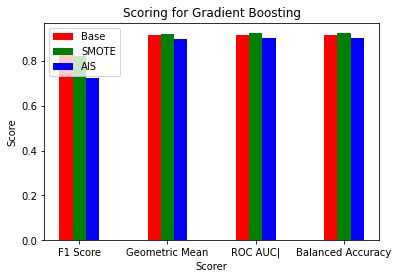

In [27]:
n = 4
ind = np.arange(n)
width = 0.15

xvals = [average_f1_score_GB_Base, average_geometric_mean_score_GB_Base, average_roc_auc_GB_Base, average_balanced_acc_GB_Base]
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = [average_f1_score_GB, average_geometric_mean_score_GB, average_roc_auc_GB, average_balanced_acc_GB]
bar2 = plt.bar(ind+width, yvals, width, color = 'g')

zvals = [average_f1_score_GB_AIS, average_geometric_mean_score_GB_AIS, average_roc_auc_GB_AIS, average_balanced_acc_GB_AIS]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Scorer")
plt.ylabel("Score")
plt.title("Scoring for Gradient Boosting")

plt.xticks(ind+width,["F1 Score", "Geometric Mean", "ROC AUC|", "Balanced Accuracy"])
plt.legend((bar1,bar2,bar3), ('Base','SMOTE', 'AIS'))

plt.show()

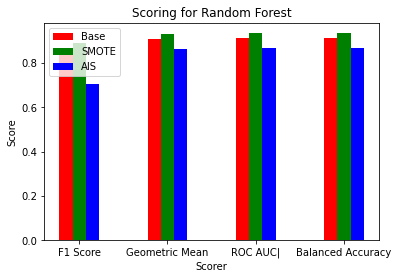

In [28]:
n = 4
ind = np.arange(n)
width = 0.15

xvals = [average_f1_score_RF_Base, average_geometric_mean_score_RF_Base, average_roc_auc_RF_Base, average_balanced_acc_RF_Base]
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = [average_f1_score_RF, average_geometric_mean_score_RF, average_roc_auc_RF, average_balanced_acc_RF]
bar2 = plt.bar(ind+width, yvals, width, color = 'g')

zvals = [average_f1_score_RF_AIS, average_geometric_mean_score_RF_AIS, average_roc_auc_RF_AIS, average_balanced_acc_RF_AIS]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Scorer")
plt.ylabel("Score")
plt.title("Scoring for Random Forest")

plt.xticks(ind+width,["F1 Score", "Geometric Mean", "ROC AUC|", "Balanced Accuracy"])
plt.legend((bar1,bar2,bar3), ('Base','SMOTE', 'AIS'))

plt.show()

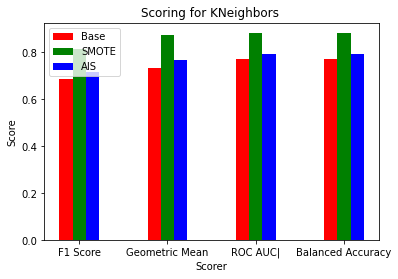

In [29]:
n = 4
ind = np.arange(n)
width = 0.15

xvals = [average_f1_score_KN_Base, average_geometric_mean_score_KN_Base, average_roc_auc_KN_Base, average_balanced_acc_KN_Base]
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = [average_f1_score_KN, average_geometric_mean_score_KN, average_roc_auc_KN, average_balanced_acc_KN]
bar2 = plt.bar(ind+width, yvals, width, color = 'g')

zvals = [average_f1_score_KN_AIS, average_geometric_mean_score_KN_AIS, average_roc_auc_KN_AIS, average_balanced_acc_KN_AIS]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Scorer")
plt.ylabel("Score")
plt.title("Scoring for KNeighbors ")

plt.xticks(ind+width,["F1 Score", "Geometric Mean", "ROC AUC|", "Balanced Accuracy"])
plt.legend((bar1,bar2,bar3), ('Base','SMOTE', 'AIS'))

plt.show()

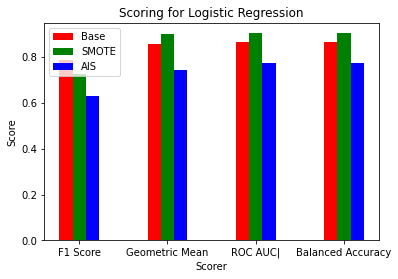

In [30]:
n = 4
ind = np.arange(n)
width = 0.15

xvals = [average_f1_score_LR_Base, average_geometric_mean_score_LR_Base, average_roc_auc_LR_Base, average_balanced_acc_LR_Base]
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = [average_f1_score_LR, average_geometric_mean_score_LR, average_roc_auc_LR, average_balanced_acc_LR]
bar2 = plt.bar(ind+width, yvals, width, color = 'g')

zvals = [average_f1_score_LR_AIS, average_geometric_mean_score_LR_AIS, average_roc_auc_LR_AIS, average_balanced_acc_LR_AIS]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Scorer")
plt.ylabel("Score")
plt.title("Scoring for Logistic Regression")

plt.xticks(ind+width,["F1 Score", "Geometric Mean", "ROC AUC|", "Balanced Accuracy"])
plt.legend((bar1,bar2,bar3), ('Base','SMOTE', 'AIS'))

plt.show()